In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('zomato_restaurants.csv')
data.head()

,Unnamed: 0,cost_for_two,cuisines,locality,rating,rest_name,votes
0,0,"1,500","['North Indian', 'European', 'Mediterranean', ...",Marathahalli,4.8,The Black Pearl ...,12080
1,1,"1,300","['American', 'Continental', 'North Indian', 'M...",Old Airport Road,4.6,Big Pitcher,11547
2,2,"2,000","['Continental', 'North Indian', 'Chinese', 'Pi...",Koramangala 5th Block,4.6,XOOX Brewmill ...,3261
3,3,"1,600","['Continental', 'Asian', 'Italian', 'North Ind...",Marathahalli,4.9,TBC- Sky Lounge ...,6485
4,4,800,"['Chinese', 'North Indian', 'Fast Food', 'Fing...","The Sahar Pavilion, Electronic City",4.0,Dr. Sheesha 24 Hours Gastro Pub ...,230


In [18]:
def ABC_segmentation(perc):
    '''
    Creates the 3 classes A, B, and C based 
    on quantity percentages (A-60%, B-25%, C-15%)
    '''
    if perc > 0 and perc < 0.6:
        return 'A'
    elif perc >= 0.6 and perc < 0.85:
        return 'B'
    elif perc >= 0.85:
        return 'C'

In [19]:
data_sub = data[['cost_for_two','rest_name','votes']]

remove_comma = lambda x: int(x.replace(',', '')) if type(x) == np.str and x != np.nan else x 
data_sub['cost_for_two'] = data_sub['cost_for_two'].apply(remove_comma)
data_sub['votes'] = data_sub['votes'].apply(remove_comma)

C:\Users\Keerthana Sundaresan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Keerthana Sundaresan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [20]:
data_sub['unit_cost'] = data_sub['cost_for_two']/2
data_sub = data_sub[['unit_cost','rest_name','votes']]
data_sub.head()

C:\Users\Keerthana Sundaresan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,unit_cost,rest_name,votes
0,750.0,The Black Pearl ...,12080
1,650.0,Big Pitcher,11547
2,1000.0,XOOX Brewmill ...,3261
3,800.0,TBC- Sky Lounge ...,6485
4,400.0,Dr. Sheesha 24 Hours Gastro Pub ...,230


In [21]:
data_sub['add_cost'] = data_sub['unit_cost'] * data_sub['votes']
data_sub = data_sub.sort_values(by=['add_cost'], ascending=False)
data_sub['cumulative'] = data_sub['add_cost'].cumsum()
data_sub['total_sum'] = data_sub['add_cost'].sum()
data_sub['run_percent'] =  data_sub['cumulative']/data_sub['total_sum']
data_sub['Class'] = data_sub['run_percent'].apply(ABC_segmentation)
data_sub.head()

,unit_cost,rest_name,votes,add_cost,cumulative,total_sum,run_percent,Class
14,1000.0,Toit,16262,16262000.0,16262000.0,962010502.5,0.016904,A
16,1200.0,Biergarten,9928,11913600.0,28175600.0,962010502.5,0.029288,A
9,800.0,AB's - Absolute Barbecues ...,14822,11857600.0,40033200.0,962010502.5,0.041614,A
42,1000.0,Brew and Barbeque - A Microbrewery Pub ...,10787,10787000.0,50820200.0,962010502.5,0.052827,A
0,750.0,The Black Pearl ...,12080,9060000.0,59880200.0,962010502.5,0.062245,A


In [22]:
data_sub.tail()

,unit_cost,rest_name,votes,add_cost,cumulative,total_sum,run_percent,Class
2839,25.0,Shree Ganesh Fruit Juice Centre ...,4,100.0,962010502.5,962010502.5,1.0,C
2557,250.0,83 Restaurant ...,0,0.0,962010502.5,962010502.5,1.0,C
27,1300.0,High Ultra Lounge ...,0,0.0,962010502.5,962010502.5,1.0,C
2290,225.0,Chopstick,0,0.0,962010502.5,962010502.5,1.0,C
6153,150.0,T-hut Cafe,0,0.0,962010502.5,962010502.5,1.0,C


In [23]:
data_sub.Class.value_counts()

C    7186
B     551
A     227
Name: Class, dtype: int64

Text(0.5, 0, 'Number of restaurants')

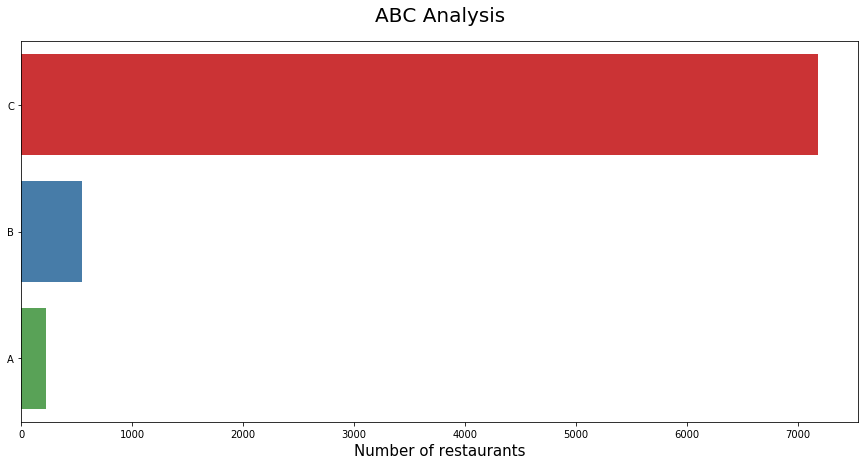

In [24]:
plt.figure(figsize=(15,7))
chains= data_sub.Class.value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("ABC Analysis",size=20,pad=20)
plt.xlabel("Number of restaurants",size=15)

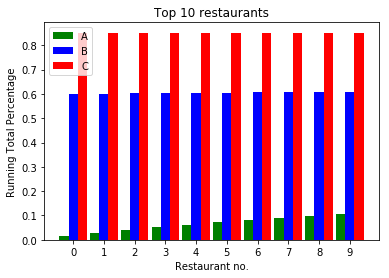

In [25]:
x = np.arange(10)

freq_A = data_sub[data_sub.Class == 'A'][:10]
freq_B = data_sub[data_sub.Class == 'B'][:10]
freq_C = data_sub[data_sub.Class == 'C'][:10]
y = freq_A['run_percent']
z = freq_B['run_percent']
k = freq_C['run_percent']

ax = plt.subplot(111)
ax.xaxis.set_ticks(np.arange(0, 10))
ax.bar(x-0.3, y, width=0.3, color='g', align='center', label='A')
ax.bar(x, z, width=0.3, color='b', align='center', label='B')
ax.bar(x+0.3, k, width=0.3, color='r', align='center', label='C')

plt.xlabel('Restaurant no.')
plt.ylabel('Running Total Percentage')
plt.title('Top 10 restaurants')
plt.legend()
plt.show()

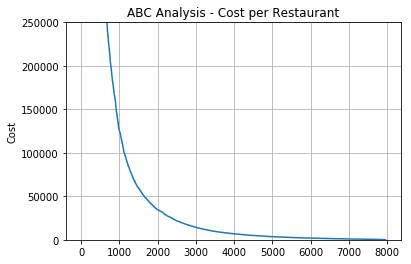

In [26]:
performance = data_sub['add_cost'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Cost')
plt.title('ABC Analysis - Cost per Restaurant')
plt.grid(True)
plt.ylim((0,250000))
plt.show()

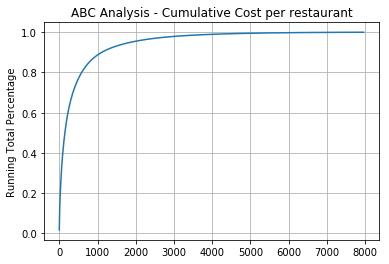

In [27]:
performance = data_sub['run_percent'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis - Cumulative Cost per restaurant')
plt.grid(True)
plt.show()

In [33]:
freq_A = data_sub[data_sub.Class == 'A'][:5]
freq_A = freq_A[['rest_name','add_cost', 'Class']]
freq_A

,rest_name,add_cost,Class
14,Toit,16262000.0,A
16,Biergarten,11913600.0,A
9,AB's - Absolute Barbecues ...,11857600.0,A
42,Brew and Barbeque - A Microbrewery Pub ...,10787000.0,A
0,The Black Pearl ...,9060000.0,A


In [31]:
freq_B = data_sub[data_sub.Class == 'B'][:5]
freq_B = freq_B[['rest_name','add_cost', 'Class']]
freq_B

,rest_name,add_cost,Class
406,1Q1,940000.0,B
660,Oye Amritsar,939950.0,B
691,Pablo's Gastrobar ...,939750.0,B
131,Smoor,926100.0,B
102,Foxtrot,925800.0,B


In [32]:
freq_C = data_sub[data_sub.Class == 'C'][:5]
freq_C = freq_C[['rest_name','add_cost', 'Class']]
freq_C

,rest_name,add_cost,Class
355,Veena Stores,199875.0,C
17,Magnolia Bakery ...,199150.0,C
1363,Chullah Chandigarh ...,198000.0,C
3810,Urban Solace,198000.0,C
2299,Maa Da Dhaba,197700.0,C
